In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
uwrfkaggler_ravdess_emotional_speech_audio_path = kagglehub.dataset_download('uwrfkaggler/ravdess-emotional-speech-audio')
ejlok1_toronto_emotional_speech_set_tess_path = kagglehub.dataset_download('ejlok1/toronto-emotional-speech-set-tess')
ejlok1_cremad_path = kagglehub.dataset_download('ejlok1/cremad')
ejlok1_surrey_audiovisual_expressed_emotion_savee_path = kagglehub.dataset_download('ejlok1/surrey-audiovisual-expressed-emotion-savee')
mostafaabdlhamed_speech_signal_features_path = kagglehub.dataset_download('mostafaabdlhamed/speech-signal-features')

print('Data source import complete.')


100%|██████████| 727M/727M [00:09<00:00, 80.8MB/s]

Extracting files...


Data source import complete.


In [4]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
# Update import for Tokenizer and pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
# Update import for Tokenizer and pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done
Done


In [5]:
!apt-get update
!apt-get install -y libsndfile1

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,702 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,968 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,264 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,245 kB]
Hit:13 https://ppa.launch

In [6]:
#preparing data set

ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_02', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_21', 'Actor_01', 'Actor_11', 'Actor_20', 'Actor_08', 'Actor_15', 'Actor_06', 'Actor_12', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_04', 'Actor_19', 'Actor_10', 'Actor_09', 'Actor_14', 'Actor_03', 'Actor_13', 'Actor_18', 'Actor_07']


In [7]:
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [8]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)


In [9]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-06-02-01-01-07.wav
03
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_02/03-01-08-01-01-01-02.wav
5
03-01-05-02-01-02-07.wav


In [10]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())



   Emotions                                               Path
0  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
______________________________________________
     Emotions                                               Path
1435     fear  /kaggle/input/ravdess-emotional-speech-audio/a...
1436    angry  /kaggle/input/ravdess-emotional-speech-audio/a...
1437      sad  /kaggle/input/ravdess-emotional-speech-audio/a...
1438  disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
1439    angry  /kaggle/input/ravdess-emotional-speech-audio/a...
_______________________________________________
Emotions
neutral     288
surprise    192
disgust     192
fear        192
sad         192
happy       192
angry       192
Name: count, dty

<ipython-input-10-2e26f59c975e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',


In [11]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())


Emotions
disgust    1271
happy      1271
sad        1271
fear       1271
angry      1271
neutral    1087
Name: count, dtype: int64


In [12]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())


Emotions
fear        400
angry       400
disgust     400
neutral     400
sad         400
surprise    400
happy       400
Name: count, dtype: int64


In [13]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())


Emotions
neutral     120
fear         60
happy        60
disgust      60
angry        60
surprise     60
sad          60
Name: count, dtype: int64


In [14]:
# Step 1: Integrate all datasets
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)

# Step 2: Filter only the selected emotion classes
selected_emotions = ['happy', 'sad', 'angry', 'fear', 'neutral']
data_path = data_path[data_path.Emotions.isin(selected_emotions)]

# Step 3: (Optional) Save the filtered data to a CSV file
data_path.to_csv("filtered_data.csv", index=False)

# Step 4: (Optional) Show class distribution
print(data_path.Emotions.value_counts())


Emotions
fear       1923
happy      1923
sad        1923
angry      1923
neutral    1895
Name: count, dtype: int64


In [15]:
print(data_path.Emotions.value_counts())


Emotions
fear       1923
happy      1923
sad        1923
angry      1923
neutral    1895
Name: count, dtype: int64


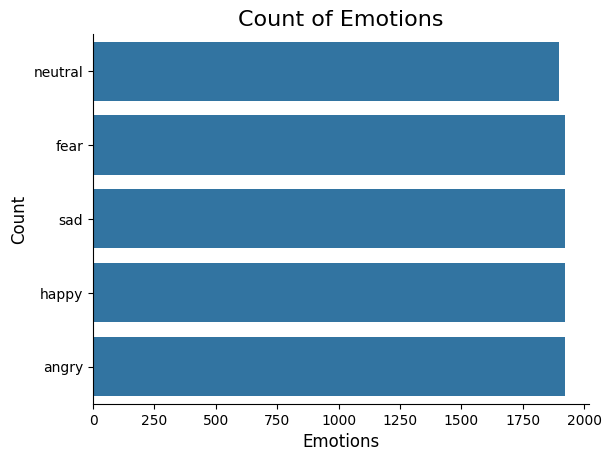

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [17]:
data,sr = librosa.load(file_path[0])
sr

22050

In [18]:
ipd.Audio(data,rate=sr)

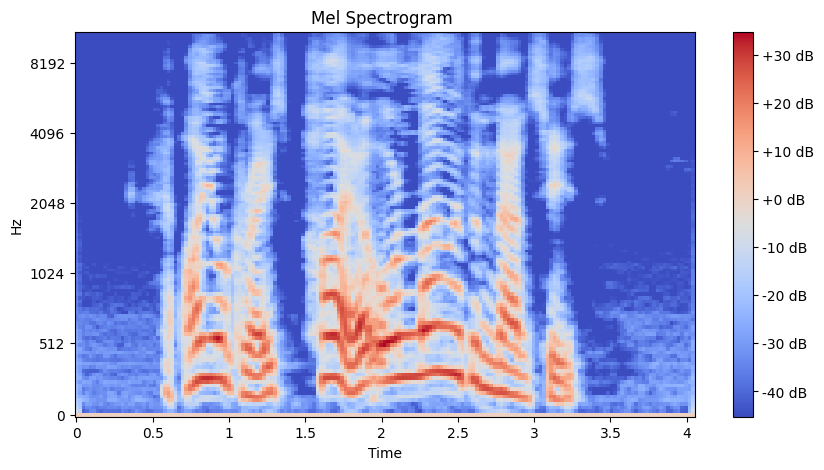

In [19]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

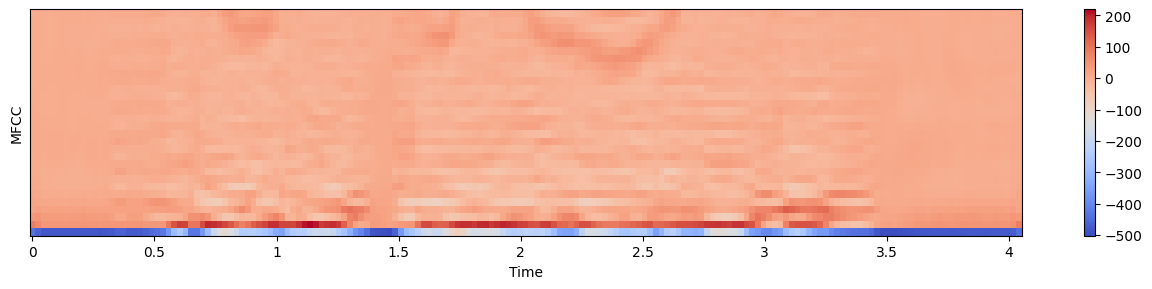

In [20]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [35]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
# The time_stretch function in recent librosa versions requires the sampling rate (sr)
# Removed sr from the function signature as time_stretch does not take sr directly
def stretch(data, sr, rate=0.8):  # Add sr to the function signature
    # The sampling rate (sr) is needed for the underlying STFT calculation within time_stretch
    # However, the 'sr' keyword argument is not expected by time_stretch itself.
    # The function will likely use the sampling rate provided when the audio data was loaded (implicitly tied to 'data').
    # Pass only the necessary arguments 'y' and 'rate' to time_stretch
    return librosa.effects.time_stretch(y=data, rate=rate)

# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor) # Use y and sr keyword arguments

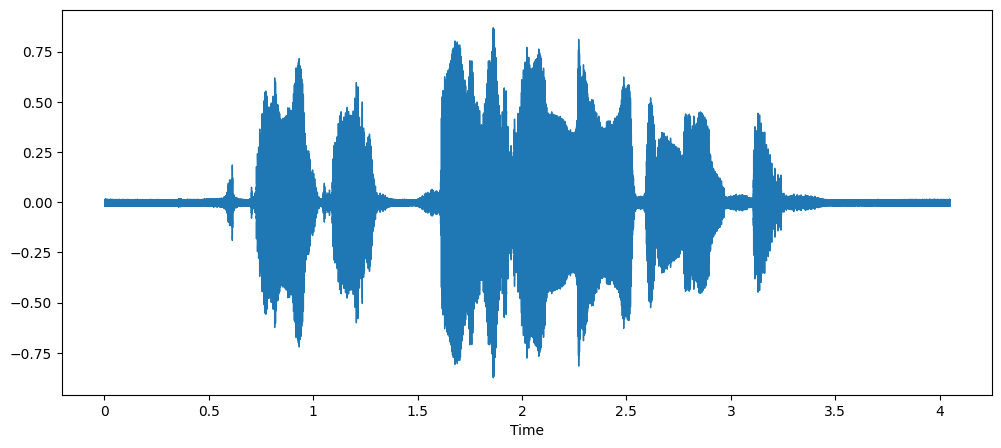

In [36]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

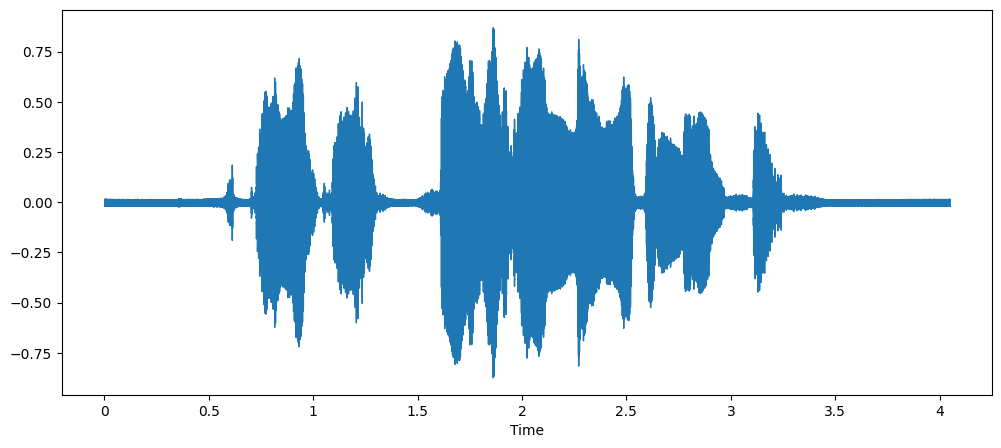

In [37]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

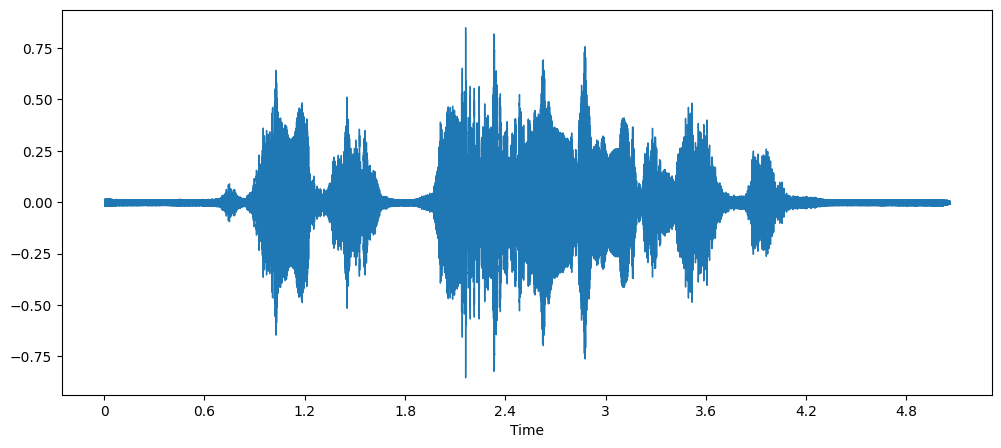

In [38]:
# STRETCHED AUDIO
# Pass the sampling rate (sr) to the stretch function
x = stretch(data, sr=sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

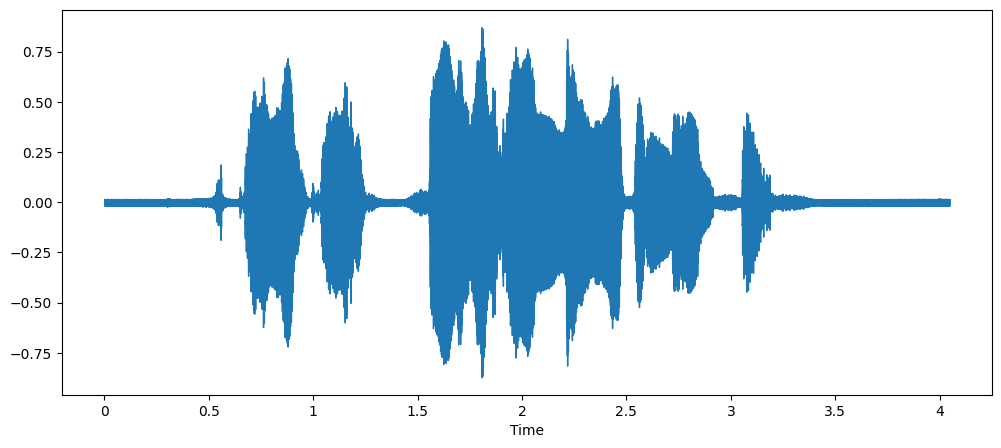

In [39]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

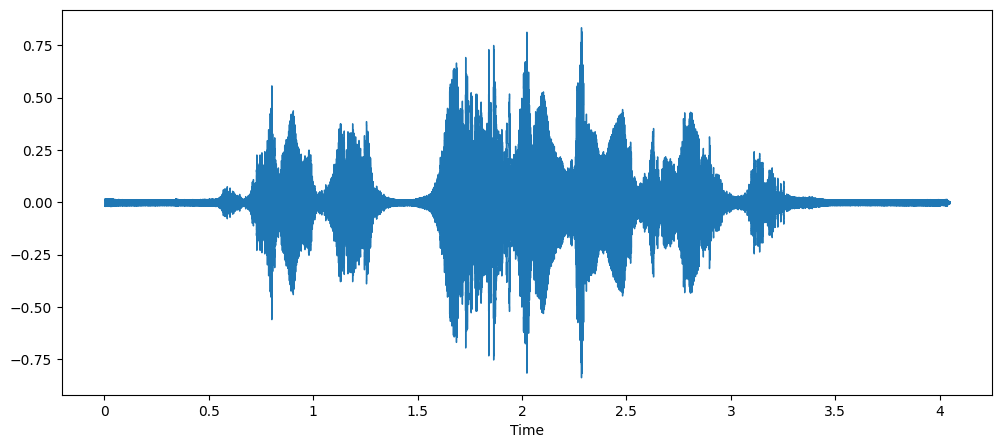

In [40]:
# AUDIO WITH PITCH
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [44]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    # Pass the audio data using the 'y' keyword argument
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))

    return audio

In [45]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  2


In [46]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)

2it [00:00,  8.49it/s]

0 audio has been processed


502it [01:11,  8.40it/s]

500 audio has been processed


1002it [02:21,  8.17it/s]

1000 audio has been processed


1502it [03:15, 10.48it/s]

1500 audio has been processed


2001it [04:08, 10.97it/s]

2000 audio has been processed


2501it [05:05, 11.01it/s]

2500 audio has been processed


3001it [06:00, 10.46it/s]

3000 audio has been processed


3502it [06:55, 10.14it/s]

3500 audio has been processed


4003it [07:50, 10.81it/s]

4000 audio has been processed


4503it [08:45, 10.11it/s]

4500 audio has been processed


5001it [09:40,  8.51it/s]

5000 audio has been processed


5502it [10:36,  9.85it/s]

5500 audio has been processed


6002it [11:31, 10.52it/s]

6000 audio has been processed


6502it [12:28,  6.31it/s]

6500 audio has been processed


7003it [13:22, 10.00it/s]

7000 audio has been processed


7503it [14:11, 14.42it/s]

7500 audio has been processed


8003it [14:52, 12.44it/s]

8000 audio has been processed


8502it [15:42, 12.14it/s]

8500 audio has been processed


9001it [16:28,  5.98it/s]

9000 audio has been processed


9501it [17:31,  4.20it/s]

9500 audio has been processed


9587it [17:42,  9.03it/s]

Done
Time:  1062.0472701200001


In [ ]:
"""from joblib import Parallel, delayed
import timeit
start = timeit.default_timer()
# Define a function to get features for a single audio file
def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    return X, Y

paths = data_path.Path
emotions = data_path.Emotions

# Run the loop in parallel
results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))

# Collect the results
X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)


stop = timeit.default_timer()

print('Time: ', stop - start)    """

In [47]:
len(X), len(Y), data_path.Path.shape


(38348, 38348, (9587,))

In [48]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.586420,2.746858,2.223281,0.986924,-0.730691,-2.530884,-4.002835,-4.849377,-4.929749,neutral
1,0.250488,0.374512,0.500977,0.517090,0.522461,0.518066,0.519043,0.505371,0.500488,0.500977,...,5.337325,1.622808,-5.774933,-0.348769,6.177459,5.626832,-1.911671,-5.996835,-2.714141,neutral
2,0.302246,0.432129,0.559082,0.503418,0.480957,0.447266,0.421875,0.404297,0.402832,0.416504,...,5.636709,5.757869,4.936111,3.190560,0.719407,-2.071541,-4.604154,-6.261105,-6.591991,neutral
3,0.255371,0.384766,0.510254,0.497070,0.505371,0.507324,0.512695,0.517090,0.508789,0.501953,...,0.386379,4.583705,1.032461,1.083252,1.636419,-0.843400,-0.387555,1.234059,1.425838,neutral
4,0.358887,0.483398,0.644531,0.678711,0.713867,0.771973,0.839844,0.825684,0.812500,0.855469,...,2.533295,2.229258,1.982186,1.749773,1.501692,1.217998,0.886900,0.503848,0.072850,neutral


In [49]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.586420,2.746858,2.223281,0.986924,-0.730691,-2.530884,-4.002835,-4.849377,-4.929749,neutral
1,0.250488,0.374512,0.500977,0.517090,0.522461,0.518066,0.519043,0.505371,0.500488,0.500977,...,5.337325,1.622808,-5.774933,-0.348769,6.177459,5.626832,-1.911671,-5.996835,-2.714141,neutral
2,0.302246,0.432129,0.559082,0.503418,0.480957,0.447266,0.421875,0.404297,0.402832,0.416504,...,5.636709,5.757869,4.936111,3.190560,0.719407,-2.071541,-4.604154,-6.261105,-6.591991,neutral
3,0.255371,0.384766,0.510254,0.497070,0.505371,0.507324,0.512695,0.517090,0.508789,0.501953,...,0.386379,4.583705,1.032461,1.083252,1.636419,-0.843400,-0.387555,1.234059,1.425838,neutral
4,0.358887,0.483398,0.644531,0.678711,0.713867,0.771973,0.839844,0.825684,0.812500,0.855469,...,2.533295,2.229258,1.982186,1.749773,1.501692,1.217998,0.886900,0.503848,0.072850,neutral


In [50]:
print(Emotions.isna().any())


0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [51]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(38348, 2377)

In [52]:
np.sum(Emotions.isna())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
0,0
1,0
2,0
3,0
4,0
...,...
2372,0
2373,0
2374,0
2375,0


In [53]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [54]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [55]:
print(Y.shape)
X.shape

(38348, 5)


(38348, 2376)

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30678, 2376), (30678, 5), (7670, 2376), (7670, 5))

In [57]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [58]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30678, 2376), (30678, 5), (7670, 2376), (7670, 5))

In [60]:
import keras
from keras.preprocessing import sequence # This specific import might still be valid depending on context, but Tokenizer and pad_sequences are not here
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [61]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [67]:
early_stop=EarlyStopping(monitor='val_accuracy',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:
"""model01=Sequential()
model01.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.3))
model01.add(LSTM(128))
#model01.add(Dropout(0.3))
model01.add(Dense(7,activation = 'softmax'))
model01.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model01.summary()"""

In [ ]:
"""hist=model01.fit(X_train, y_train,
            epochs=20,
            validation_data=(X_test, y_test),batch_size=64,
            verbose=1)"""

In [ ]:
"""print("Accuracy of our model on test data : " , model01.evaluate(X_test,y_test)[1]*100 , "%")
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()"""

In [68]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((30678, 2376, 1), (30678, 5), (7670, 2376, 1), (7670, 5))

In [69]:
import tensorflow.keras.layers as L
from keras.layers import Dropout # Make sure Dropout is imported

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(5,activation='softmax')
])
# Enclose 'accuracy' in a list
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 2376, 512)      │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 2376, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 1188, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 1188, 512)      │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 1188, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 594, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 594, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 297, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 297, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 297, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 149, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 149, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     4,915,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         2,56

 Total params: 7,192,197 (27.44 MB)

 Trainable params: 7,187,845 (27.42 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [71]:
history=model.fit(x_traincnn, y_train, epochs=30, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.4463 - loss: 1.4848

480/480 ━━━━━━━━━━━━━━━━━━━━ 128s 252ms/step - accuracy: 0.4465 - loss: 1.4843 - val_accuracy: 0.4043 - val_loss: 1.5105 - learning_rate: 0.0010
Epoch 2/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.5939 - loss: 0.9916

480/480 ━━━━━━━━━━━━━━━━━━━━ 109s 228ms/step - accuracy: 0.5939 - loss: 0.9915 - val_accuracy: 0.5970 - val_loss: 0.9900 - learning_rate: 0.0010
Epoch 3/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.6415 - loss: 0.8723

480/480 ━━━━━━━━━━━━━━━━━━━━ 109s 227ms/step - accuracy: 0.6415 - loss: 0.8723 - val_accuracy: 0.6469 - val_loss: 0.8975 - learning_rate: 0.0010
Epoch 4/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.6817 - loss: 0.7909

480/480 ━━━━━━━━━━━━━━━━━━━━ 141s 225ms/step - accuracy: 0.6817 - loss: 0.7909 - val_accuracy: 0.6632 - val_loss: 0.8455 - learning_rate: 0.0010
Epoch 5/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.7179 - loss: 0.7113

480/480 ━━━━━━━━━━━━━━━━━━━━ 113s 236ms/step - accuracy: 0.7179 - loss: 0.7113 - val_accuracy: 0.6705 - val_loss: 0.7890 - learning_rate: 0.0010
Epoch 6/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.7422 - loss: 0.6554

480/480 ━━━━━━━━━━━━━━━━━━━━ 140s 232ms/step - accuracy: 0.7422 - loss: 0.6554 - val_accuracy: 0.7282 - val_loss: 0.6782 - learning_rate: 0.0010
Epoch 7/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.7986 - loss: 0.5239

480/480 ━━━━━━━━━━━━━━━━━━━━ 142s 231ms/step - accuracy: 0.7986 - loss: 0.5239 - val_accuracy: 0.7348 - val_loss: 0.6771 - learning_rate: 0.0010
Epoch 8/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.8349 - loss: 0.4336

480/480 ━━━━━━━━━━━━━━━━━━━━ 142s 231ms/step - accuracy: 0.8349 - loss: 0.4336 - val_accuracy: 0.7806 - val_loss: 0.6081 - learning_rate: 0.0010
Epoch 9/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.8784 - loss: 0.3331

480/480 ━━━━━━━━━━━━━━━━━━━━ 142s 231ms/step - accuracy: 0.8784 - loss: 0.3331 - val_accuracy: 0.8126 - val_loss: 0.4943 - learning_rate: 0.0010
Epoch 10/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.9088 - loss: 0.2479

480/480 ━━━━━━━━━━━━━━━━━━━━ 142s 231ms/step - accuracy: 0.9088 - loss: 0.2479 - val_accuracy: 0.8405 - val_loss: 0.4347 - learning_rate: 0.0010
Epoch 11/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.9415 - loss: 0.1748

480/480 ━━━━━━━━━━━━━━━━━━━━ 142s 230ms/step - accuracy: 0.9415 - loss: 0.1748 - val_accuracy: 0.8910 - val_loss: 0.3132 - learning_rate: 0.0010
Epoch 12/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.9490 - loss: 0.1468

480/480 ━━━━━━━━━━━━━━━━━━━━ 112s 233ms/step - accuracy: 0.9490 - loss: 0.1468 - val_accuracy: 0.9159 - val_loss: 0.2381 - learning_rate: 0.0010
Epoch 13/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.9657 - loss: 0.1048

480/480 ━━━━━━━━━━━━━━━━━━━━ 143s 235ms/step - accuracy: 0.9657 - loss: 0.1049 - val_accuracy: 0.9253 - val_loss: 0.2117 - learning_rate: 0.0010
Epoch 14/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 108s 225ms/step - accuracy: 0.9611 - loss: 0.1143 - val_accuracy: 0.9219 - val_loss: 0.2387 - learning_rate: 0.0010
Epoch 15/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 142s 226ms/step - accuracy: 0.9661 - loss: 0.0964 - val_accuracy: 0.9176 - val_loss: 0.2440 - learning_rate: 0.0010
Epoch 16/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.9735 - loss: 0.0786
Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
480/480 ━━━━━━━━━━━━━━━━━━━━ 108s 225ms/step - accuracy: 0.9735 - loss: 0.0786 - val_accuracy: 0.9046 - val_loss: 0.2942 - learning_rate: 0.0010
Epoch 17/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.9870 - loss: 0.0436

480/480 ━━━━━━━━━━━━━━━━━━━━ 108s 225ms/step - accuracy: 0.9870 - loss: 0.0436 - val_accuracy: 0.9674 - val_loss: 0.1037 - learning_rate: 5.0000e-04
Epoch 18/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.9956 - loss: 0.0190

480/480 ━━━━━━━━━━━━━━━━━━━━ 147s 235ms/step - accuracy: 0.9956 - loss: 0.0190 - val_accuracy: 0.9686 - val_loss: 0.0961 - learning_rate: 5.0000e-04
Epoch 19/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9961 - loss: 0.0161

480/480 ━━━━━━━━━━━━━━━━━━━━ 138s 226ms/step - accuracy: 0.9961 - loss: 0.0161 - val_accuracy: 0.9696 - val_loss: 0.1008 - learning_rate: 5.0000e-04
Epoch 20/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 108s 225ms/step - accuracy: 0.9955 - loss: 0.0161 - val_accuracy: 0.9678 - val_loss: 0.0981 - learning_rate: 5.0000e-04
Epoch 21/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 108s 225ms/step - accuracy: 0.9928 - loss: 0.0246 - val_accuracy: 0.9623 - val_loss: 0.1143 - learning_rate: 5.0000e-04
Epoch 22/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9907 - loss: 0.0275
Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
480/480 ━━━━━━━━━━━━━━━━━━━━ 147s 235ms/step - accuracy: 0.9907 - loss: 0.0275 - val_accuracy: 0.9683 - val_loss: 0.1054 - learning_rate: 5.0000e-04
Epoch 23/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.9954 - loss: 0.0164

480/480 ━━━━━━━━━━━━━━━━━━━━ 142s 235ms/step - accuracy: 0.9954 - loss: 0.0164 - val_accuracy: 0.9764 - val_loss: 0.0756 - learning_rate: 2.5000e-04
Epoch 24/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.9975 - loss: 0.0097

480/480 ━━━━━━━━━━━━━━━━━━━━ 108s 226ms/step - accuracy: 0.9975 - loss: 0.0097 - val_accuracy: 0.9789 - val_loss: 0.0705 - learning_rate: 2.5000e-04
Epoch 25/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 146s 235ms/step - accuracy: 0.9987 - loss: 0.0067 - val_accuracy: 0.9781 - val_loss: 0.0703 - learning_rate: 2.5000e-04
Epoch 26/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 113s 235ms/step - accuracy: 0.9988 - loss: 0.0065 - val_accuracy: 0.9781 - val_loss: 0.0722 - learning_rate: 2.5000e-04
Epoch 27/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9986 - loss: 0.0073
Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
480/480 ━━━━━━━━━━━━━━━━━━━━ 138s 226ms/step - accuracy: 0.9986 - loss: 0.0073 - val_accuracy: 0.9773 - val_loss: 0.0767 - learning_rate: 2.5000e-04
Epoch 28/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9986 - loss: 0.0062

480/480 ━━━━━━━━━━━━━━━━━━━━ 147s 236ms/step - accuracy: 0.9986 - loss: 0.0062 - val_accuracy: 0.9799 - val_loss: 0.0704 - learning_rate: 1.2500e-04
Epoch 29/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9992 - loss: 0.0044

480/480 ━━━━━━━━━━━━━━━━━━━━ 137s 227ms/step - accuracy: 0.9992 - loss: 0.0044 - val_accuracy: 0.9810 - val_loss: 0.0695 - learning_rate: 1.2500e-04
Epoch 30/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 113s 235ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9789 - val_loss: 0.0714 - learning_rate: 1.2500e-04


240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9812 - loss: 0.0692
Accuracy of our model on test data :  98.09647798538208 %


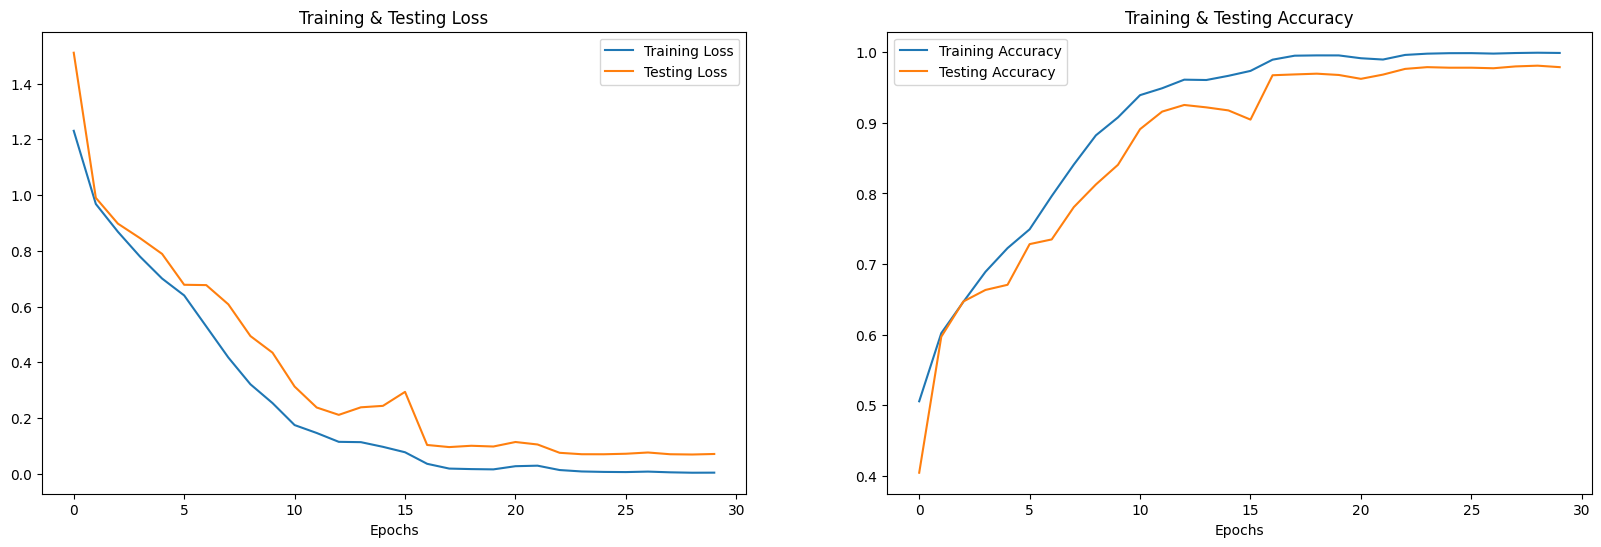

In [73]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

# Get the actual number of epochs from the training history
epochs = range(len(history.history['accuracy']))

fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [74]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

240/240 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step


,Predicted Labels,Actual Labels
0,angry,angry
1,happy,happy
2,neutral,neutral
3,neutral,neutral
4,sad,sad
5,happy,happy
6,happy,happy
7,neutral,neutral
8,fear,fear
9,sad,sad


In [75]:
df0

,Predicted Labels,Actual Labels
0,angry,angry
1,happy,happy
2,neutral,neutral
3,neutral,neutral
4,sad,sad
...,...,...
7665,neutral,neutral
7666,angry,angry
7667,sad,sad
7668,happy,happy


In [76]:
#Build the model

# define model
"""model000 = Sequential()
model000.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X.shape[1], 1)))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))


model000.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))

model000.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))

model000.add(LSTM(128, return_sequences=True))
model000.add(Dropout(0.3))

model000.add(LSTM(128, return_sequences=True))
model000.add(Dropout(0.3))
model000.add(LSTM(128))
model000.add(Dropout(0.3))

model000.add(Dense(128, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(64, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(32, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(7, activation='softmax'))



model000.summary()"""

"model000 = Sequential()\nmodel000.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X.shape[1], 1)))\nmodel000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))\nmodel000.add(BatchNormalization())\nmodel000.add(Dropout(0.3))\n\n\nmodel000.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))\nmodel000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))\nmodel000.add(BatchNormalization())\nmodel000.add(Dropout(0.3))\n\nmodel000.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))\nmodel000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))\nmodel000.add(BatchNormalization())\nmodel000.add(Dropout(0.3))\n\nmodel000.add(LSTM(128, return_sequences=True))\nmodel000.add(Dropout(0.3))\n\nmodel000.add(LSTM(128, return_sequences=True))\nmodel000.add(Dropout(0.3))\nmodel000.add(LSTM(128))\nmodel000.add(Dropout(0.3))\n\nmodel000.add(Dense(128, activation='relu'))\n#model000.

In [77]:
"""from keras.utils.vis_utils import plot_model
plot_model( model000, show_shapes=True, show_layer_names=True, to_file='model000.png')"""

"from keras.utils.vis_utils import plot_model\nplot_model( model000, show_shapes=True, show_layer_names=True, to_file='model000.png')"

In [78]:
"""model000.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])"""

"model000.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])"

In [79]:
"""hist1=model000.fit(x_traincnn, y_train, batch_size=64, epochs=40, validation_data=(x_testcnn, y_test))"""

'hist1=model000.fit(x_traincnn, y_train, batch_size=64, epochs=40, validation_data=(x_testcnn, y_test))'

In [80]:
"""print("Accuracy of our model on test data : " , model000.evaluate(x_testcnn,y_test)[1]*100 , "%")
epochs = [i for i in range(40)]
fig , ax = plt.subplots(1,2)
train_acc = hist1.history['accuracy']
train_loss = hist1.history['loss']
test_acc = hist1.history['val_accuracy']
test_loss = hist1.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()"""

'print("Accuracy of our model on test data : " , model000.evaluate(x_testcnn,y_test)[1]*100 , "%")\nepochs = [i for i in range(40)]\nfig , ax = plt.subplots(1,2)\ntrain_acc = hist1.history[\'accuracy\']\ntrain_loss = hist1.history[\'loss\']\ntest_acc = hist1.history[\'val_accuracy\']\ntest_loss = hist1.history[\'val_loss\']\n\nfig.set_size_inches(20,6)\nax[0].plot(epochs , train_loss , label = \'Training Loss\')\nax[0].plot(epochs , test_loss , label = \'Testing Loss\')\nax[0].set_title(\'Training & Testing Loss\')\nax[0].legend()\nax[0].set_xlabel("Epochs")\n\nax[1].plot(epochs , train_acc , label = \'Training Accuracy\')\nax[1].plot(epochs , test_acc , label = \'Testing Accuracy\')\nax[1].set_title(\'Training & Testing Accuracy\')\nax[1].legend()\nax[1].set_xlabel("Epochs")\nplt.show()'

In [81]:
# predicting on test data.
"""pred_test00 = model000.predict(x_testcnn)
y_pred00 = encoder.inverse_transform(pred_test)
y_test00 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred00.flatten()
df0['Actual Labels'] = y_test00.flatten()

df0.head(10)"""

"pred_test00 = model000.predict(x_testcnn)\ny_pred00 = encoder.inverse_transform(pred_test)\ny_test00 = encoder.inverse_transform(y_test)\n\n# Check for random predictions\ndf0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])\ndf0['Predicted Labels'] = y_pred00.flatten()\ndf0['Actual Labels'] = y_test00.flatten()\n\ndf0.head(10)"

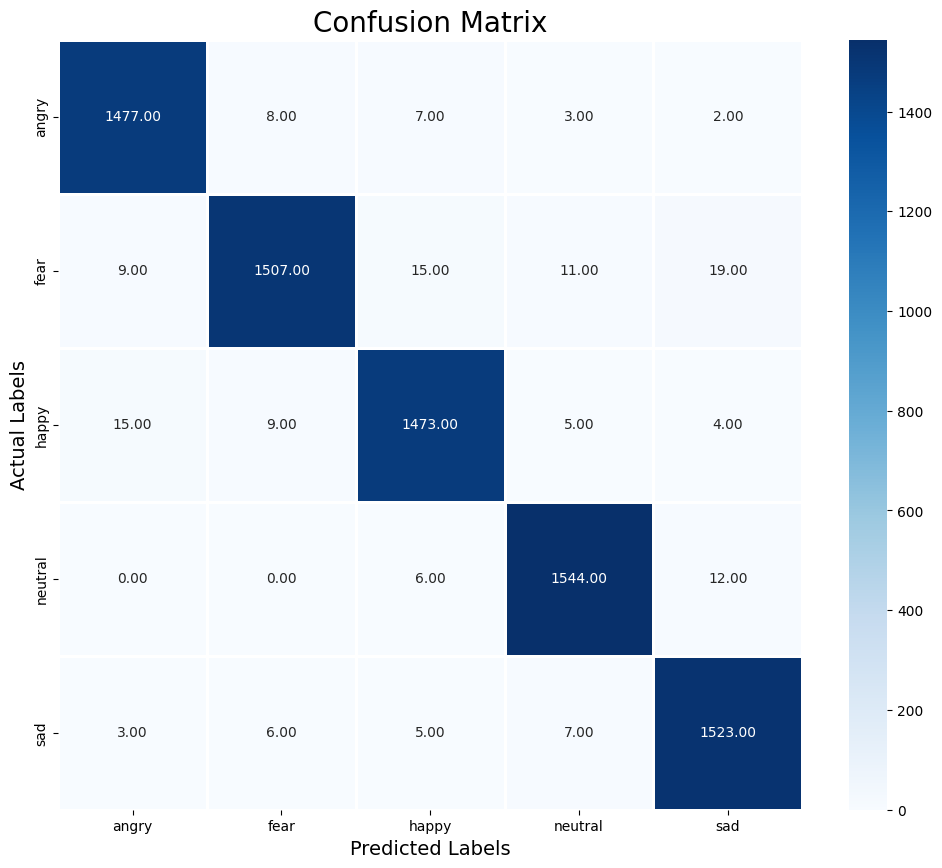

              precision    recall  f1-score   support

       angry       0.98      0.99      0.98      1497
        fear       0.98      0.97      0.98      1561
       happy       0.98      0.98      0.98      1506
     neutral       0.98      0.99      0.99      1562
         sad       0.98      0.99      0.98      1544

    accuracy                           0.98      7670
   macro avg       0.98      0.98      0.98      7670
weighted avg       0.98      0.98      0.98      7670



In [82]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [115]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_model.weights.h5")
print("Saved model to disk")

Saved model to disk


In [116]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/content/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/best_model1_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [117]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9812 - loss: 0.0692
compile_metrics: 98.10%


In [118]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

Done


In [120]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/content/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/best_model1_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [121]:
import pickle

with open('/content/scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

with open('/content/encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

Done


In [122]:
import librosa

In [126]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    # Pass the audio data using the 'y' keyword argument
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [127]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=extract_features(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,2376))
    i_result = scaler2.transform(result)
    final_result=np.expand_dims(i_result, axis=2)

    return final_result

In [128]:
res=get_predict_feat("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-07-01-01-01-01.wav")
print(res.shape)

(1, 2376, 1)


In [129]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0])

In [130]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
neutral


In [131]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
neutral


In [132]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-02-02-01.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
angry


In [133]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_21/03-01-04-02-02-02-21.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
sad


In [134]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-01-02-02-02.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
fear


In [135]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-08-01-01-01-01.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
angry


In [136]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-07-01-01-01-01.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
angry
